In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.cluster import KMeans
import sklearn.cluster as cls
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Data Loading

In [ ]:
data = pd.read_csv('College.csv')
data.head(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
#change 'Unnamed: 0' to 'Name'
data.columns = ['Name', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate']
data.columns

Index(['Name', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [ ]:
data.shape

(777, 19)

### Data Understanding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [ ]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### Data Cleaning

In [ ]:
data.isnull().sum()

Name           0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

## Exploratory Data Analytics

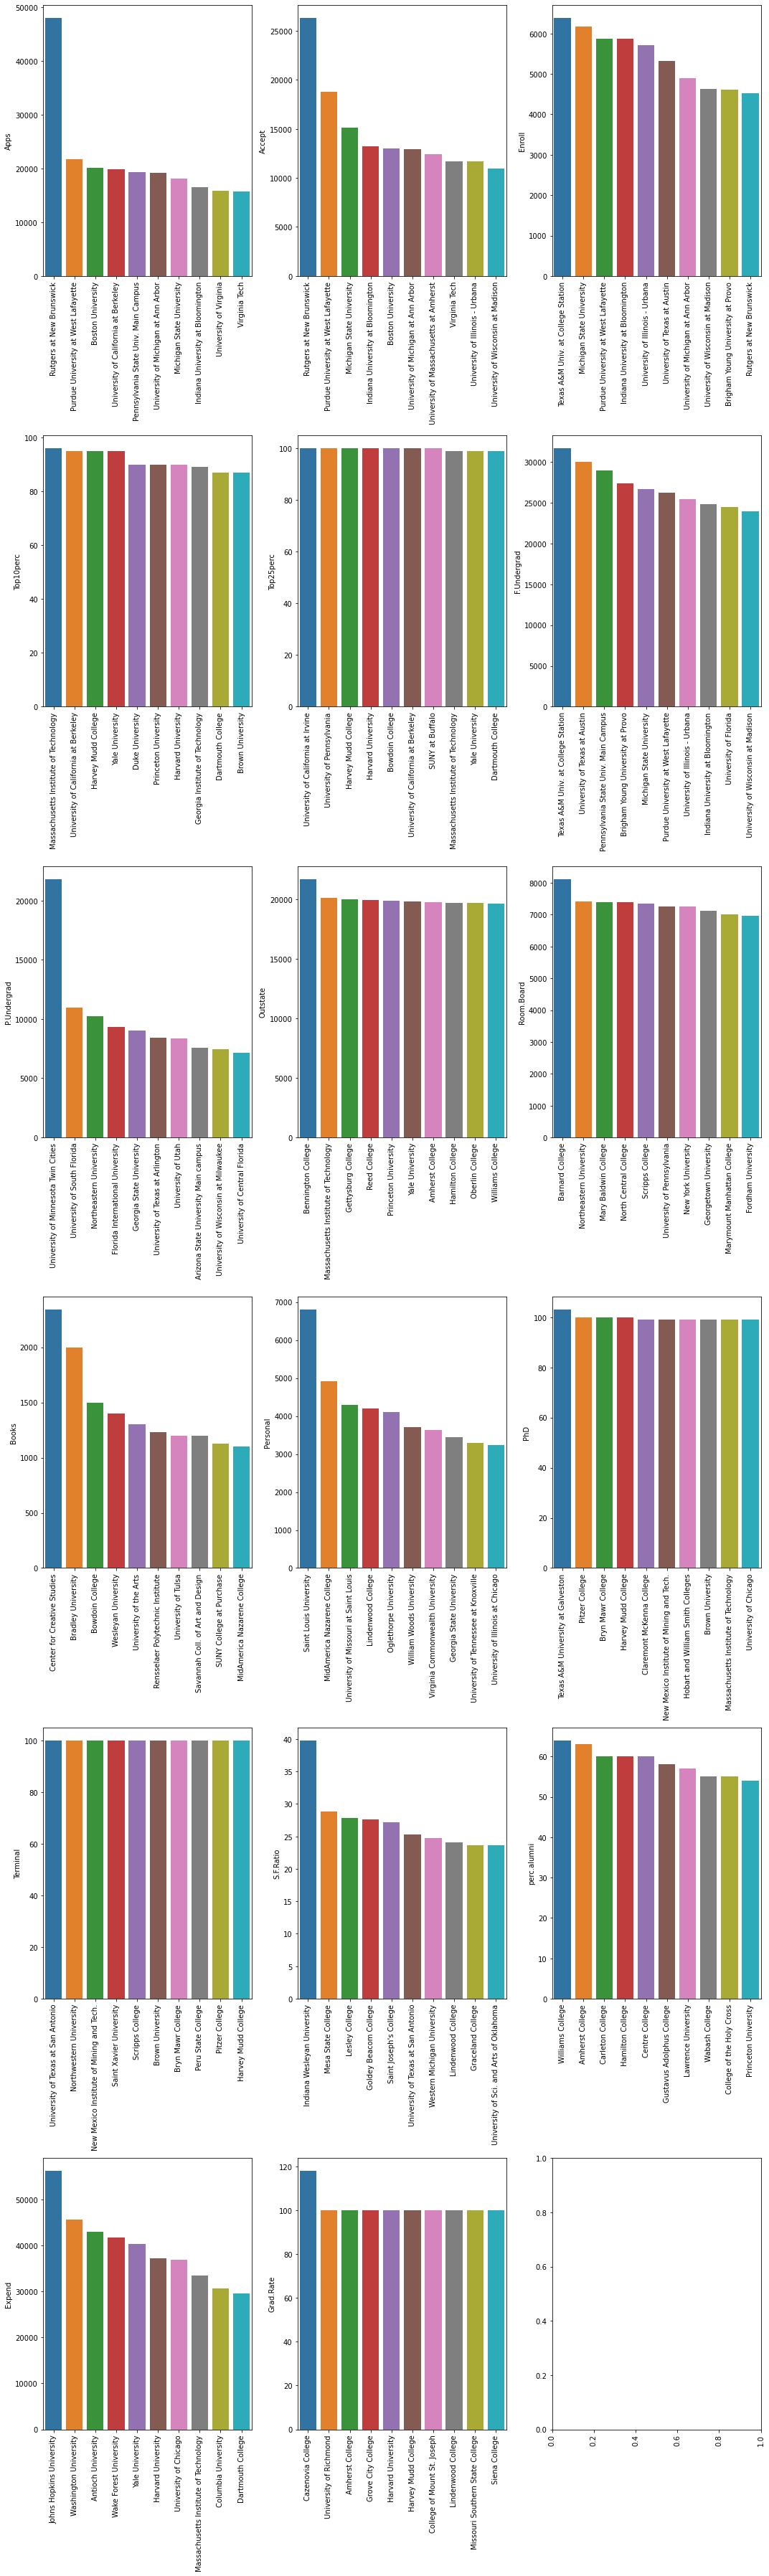

In [ ]:
fig, axs = plt.subplots(6,3,figsize = (15,50))

# Top 10 University Application Rate

top10_Apps = data[['Name','Apps']].sort_values('Apps', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='Apps', data= top10_Apps, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Apps')

# Top 10 University Acceptance Rate

top10_Accept = data[['Name','Accept']].sort_values('Accept', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='Accept', data= top10_Accept, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Accept')

# Top 10 University Enrollment Rate

top10_Enroll = data[['Name','Enroll']].sort_values('Enroll', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='Enroll', data= top10_Enroll, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Enroll')

# Top 10 University Top 10 percent Rate

top10_Top10perc = data[['Name','Top10perc']].sort_values('Top10perc', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='Top10perc', data= top10_Top10perc, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Top10perc')

# Top 10 University Top 25 percent Rate

top10_Top25perc = data[['Name','Top25perc']].sort_values('Top25perc', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='Top25perc', data= top10_Top25perc, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'Top25perc')

# Top 10 University F.Undergrad Rate

top10_F_Undergrad = data[['Name','F.Undergrad']].sort_values('F.Undergrad', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='F.Undergrad', data= top10_F_Undergrad, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'F.Undergrad')


# Top 10 University P.Undergrad Rate

top10_P_Undergrad = data[['Name','P.Undergrad']].sort_values('P.Undergrad', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='P.Undergrad', data= top10_P_Undergrad, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'P.Undergrad')


# Top 10 University Outstate Students Rate

top10_Outstate = data[['Name','Outstate']].sort_values('Outstate', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='Outstate', data= top10_Outstate, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Outstate')


# Top 10 University Room Board Availability 

top10_Room_Board = data[['Name','Room.Board']].sort_values('Room.Board', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='Room.Board', data= top10_Room_Board, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Room.Board')

# Top 10 University Books Price

top10_Books = data[['Name','Books']].sort_values('Books', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='Books', data= top10_Books, ax = axs[3,0])
plt1.set(xlabel = '', ylabel= 'Books')

# Top 10 University Personal Rate

top10_Personal = data[['Name','Personal']].sort_values('Personal', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='Personal', data= top10_Personal, ax = axs[3,1])
plt1.set(xlabel = '', ylabel= 'Personal')

# Top 10 University PhD Rate

top10_PhD = data[['Name','PhD']].sort_values('PhD', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='PhD', data= top10_PhD, ax = axs[3,2])
plt1.set(xlabel = '', ylabel= 'PhD')

# Top 10 University Terminal Rate

top10_Terminal = data[['Name','Terminal']].sort_values('Terminal', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='Terminal', data= top10_Terminal, ax = axs[4,0])
plt1.set(xlabel = '', ylabel= 'Terminal')

# Top 10 University S.F.Ratio Rate

top10_S_F_Ratio = data[['Name','S.F.Ratio']].sort_values('S.F.Ratio', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='S.F.Ratio', data= top10_S_F_Ratio, ax = axs[4,1])
plt1.set(xlabel = '', ylabel= 'S.F.Ratio')


# Top 10 University perc.alumni Rate

top10_perc_alumni = data[['Name','perc.alumni']].sort_values('perc.alumni', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='perc.alumni', data= top10_perc_alumni, ax = axs[4,2])
plt1.set(xlabel = '', ylabel= 'perc.alumni')


# Top 10 University Expend Rate

top10_Expend = data[['Name','Expend']].sort_values('Expend', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='Expend', data= top10_Expend, ax = axs[5,0])
plt1.set(xlabel = '', ylabel= 'Expend')


# Top 10 University Grad.Rate 

top10_Grad_Rate = data[['Name','Grad.Rate']].sort_values('Grad.Rate', ascending = False).head(10)
plt1 = sns.barplot(x='Name', y='Grad.Rate', data= top10_Grad_Rate, ax = axs[5,1])
plt1.set(xlabel = '', ylabel= 'Grad.Rate')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

Visualization of the top 10 of each columns

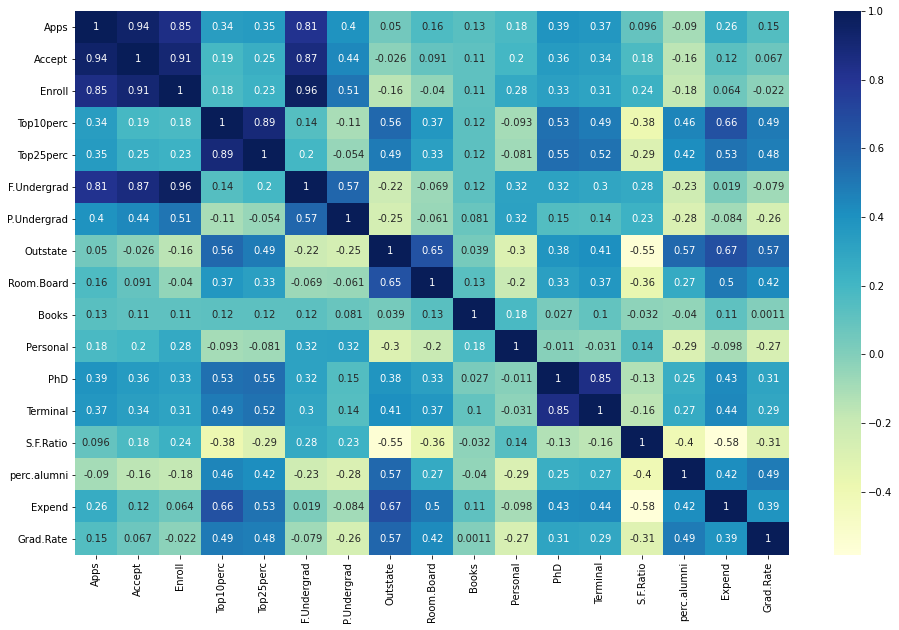

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

heatmap showing correlation of each column to another

In [ ]:
##Copy Data
datapca=data.copy()

### Scaling the data

In [ ]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate']
# Scale these variables using 'fit_transform'
datapca[varlist] = scaler.fit_transform(data[varlist])
datapca

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,Adelphi University,Yes,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,Adrian College,Yes,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,Agnes Scott College,Yes,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,Alaska Pacific University,Yes,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301
773,Xavier University,Yes,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555
774,Xavier University of Louisiana,Yes,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029
775,Yale University,Yes,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595


## PCA on the Data

In [ ]:
# Putting feature variable to X
X = datapca.drop(['Name','Private'],axis=1)

# Putting COUNTRY
Name = datapca['Name']

In [ ]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [ ]:
#Doing the PCA on the train data
pca.fit(X)

PCA(random_state=42)

#### PCA Component or Weight

In [ ]:
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [ ]:
pca.components_[0]

array([ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
        0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
       -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
        0.31890875,  0.25231565])

In [ ]:
pca.components_[1]

array([ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
        0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
        0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
       -0.13168986, -0.16924053])

In [ ]:
pca.components_[2]

array([-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
       -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
        0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
        0.22674398, -0.20806465])

In [ ]:
pca.components_[3]

array([ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
        0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
       -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
        0.07927349,  0.26912907])

In [ ]:
pca.components_[4]

array([ 0.00574141,  0.05578609, -0.05569364, -0.39543434, -0.42653359,
       -0.04345437,  0.30238541,  0.222532  ,  0.56091947, -0.12728883,
       -0.22231102,  0.14016633,  0.20471973, -0.07938825, -0.21629741,
        0.07595812, -0.10926791])

In [ ]:
pca.components_[5]

array([-0.01623744,  0.00753468, -0.04255798, -0.0526928 ,  0.03309159,
       -0.04345423, -0.19119858, -0.03000039,  0.16275545,  0.64105495,
       -0.331398  ,  0.09125552,  0.15492765,  0.48704587, -0.04734001,
       -0.29811862,  0.21616331])

In [ ]:
pca.components_[6]

array([-0.04248635, -0.01294972, -0.02769289, -0.16133207, -0.11848556,
       -0.02507636,  0.06104235,  0.10852897,  0.20974423, -0.14969203,
        0.63379006, -0.00109641, -0.02847701,  0.21925936,  0.24332116,
       -0.22658448,  0.55994394])

In [ ]:
pca.components_[7]

array([-0.1030904 , -0.05627096,  0.05866236, -0.12267803, -0.10249197,
        0.07888964,  0.57078382,  0.009846  , -0.22145344,  0.21329301,
       -0.23266084, -0.07704   , -0.01216133, -0.08360487,  0.67852365,
       -0.05415938, -0.00533554])

In [ ]:
pca.components_[8]

array([-0.09022708, -0.17786481, -0.12856071,  0.34109986,  0.40371199,
       -0.05944192,  0.5606729 , -0.00457333,  0.27502255, -0.13366335,
       -0.09446889, -0.18518152, -0.2549382 ,  0.27454438, -0.25533491,
       -0.04913888,  0.04190431])

In [ ]:
pca.components_[9]

array([ 0.0525098 ,  0.04114008,  0.03448791,  0.06402578,  0.01454923,
        0.02084718, -0.22310581,  0.18667536,  0.29832424, -0.08202922,
        0.13602762, -0.1234522 , -0.08857846,  0.47204525,  0.42299971,
        0.13228633, -0.59027107])

In [ ]:
pca.components_[10]

array([ 0.04304621, -0.05840559, -0.06939888, -0.00810481, -0.27312847,
       -0.08115782,  0.10069332,  0.14322067, -0.35932173,  0.03194004,
       -0.01857847,  0.04037233, -0.0589734 ,  0.44500073, -0.13072798,
        0.69208887,  0.219839  ])

In [ ]:
pca.components_[11]

array([ 0.02407091, -0.14510245,  0.01114315,  0.0385543 , -0.08935156,
        0.05617677, -0.06353607, -0.82344378,  0.35455973, -0.02815937,
       -0.03926403,  0.02322243,  0.01648504, -0.01102621,  0.18266065,
        0.3259823 ,  0.1221067 ])

In [ ]:
pca.components_[12]

array([ 0.59583097,  0.2926424 , -0.44463821,  0.00102304,  0.02188388,
       -0.52362227,  0.12599765, -0.14185601, -0.06974859,  0.011438  ,
        0.03945474,  0.12769638, -0.05831347, -0.01771527,  0.10408809,
       -0.09374645, -0.06919698])

In [ ]:
pca.components_[13]

array([ 0.0806328 ,  0.03346743, -0.08569672, -0.10782819,  0.15174211,
       -0.05637288,  0.01928575, -0.03401154, -0.05842898, -0.06684946,
        0.02752862, -0.69112615,  0.67100861,  0.0413741 , -0.02715421,
        0.07312252,  0.03647674])

In [ ]:
pca.components_[14]

array([ 0.13340581, -0.14549751,  0.02958961,  0.69772252, -0.61727482,
        0.00991641,  0.0209516 ,  0.03835448,  0.00340197, -0.00943888,
       -0.00309001, -0.1120556 ,  0.15890965, -0.02089913, -0.00841789,
       -0.22774202, -0.00339434])

In [ ]:
pca.components_[15]

array([ 0.4591395 , -0.51856879, -0.40431844, -0.14873872,  0.05186834,
        0.56036305, -0.0527313 ,  0.10159483, -0.02592934,  0.00288283,
       -0.0128904 ,  0.02980755, -0.02707598, -0.02124763,  0.00333406,
       -0.04388032, -0.00500845])

In [ ]:
pca.components_[16]

array([ 0.3589704 , -0.54342725,  0.60965111, -0.14498633,  0.08034784,
       -0.41470528,  0.00901789,  0.05089959,  0.0011464 ,  0.00077263,
       -0.00111433,  0.01381334,  0.00620933, -0.00222215, -0.01918697,
       -0.03530982, -0.013071  ])

In [ ]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.248766,0.331598,Apps
1,0.207602,0.372117,Accept
2,0.176304,0.403724,Enroll
3,0.354274,-0.082412,Top10perc
4,0.344001,-0.044779,Top25perc
5,0.154641,0.417674,F.Undergrad
6,0.026443,0.315088,P.Undergrad
7,0.294736,-0.249644,Outstate
8,0.249030,-0.137809,Room.Board
9,0.064758,0.056342,Books


### Choose Number of PC


In [ ]:
#Eigenvalue
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [ ]:
#Proportion
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

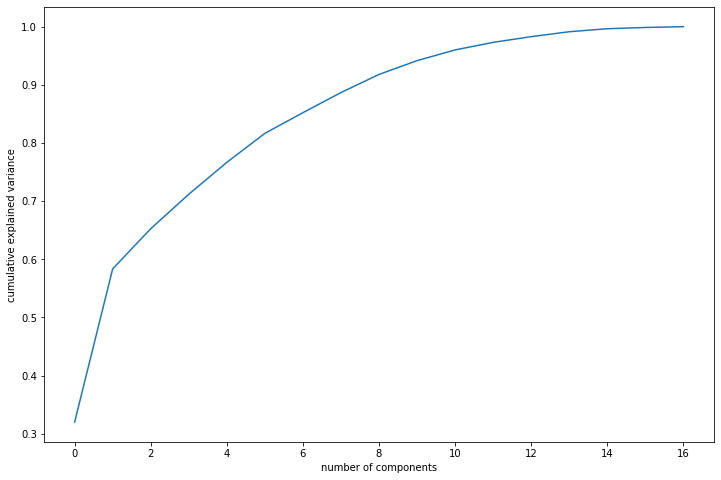

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

from the elbow method above, it is clear to take 2 as the amount of cluster

#### Looks like 4 components are enough to describe 95% of the variance in the dataset
We'll choose 4 components for our modeling


In [ ]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
pca_final= PCA(n_components=2,random_state=42)

#### Basis transformation - getting the data onto our PCs

In [ ]:
df_pca = pca_final.fit_transform(X)

In [ ]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1
0,-1.592855,0.767334
1,-2.192402,-0.578831
2,-1.430964,-1.092819
3,2.855557,-2.630612
4,-2.212008,0.021630


<AxesSubplot:>

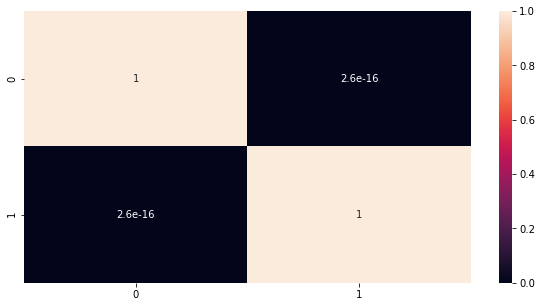

In [ ]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(df_pca.corr(),annot = True)

heatmap above showing little correlation to each other, meaning the PCA is acceptable

## Hierarchical clustering

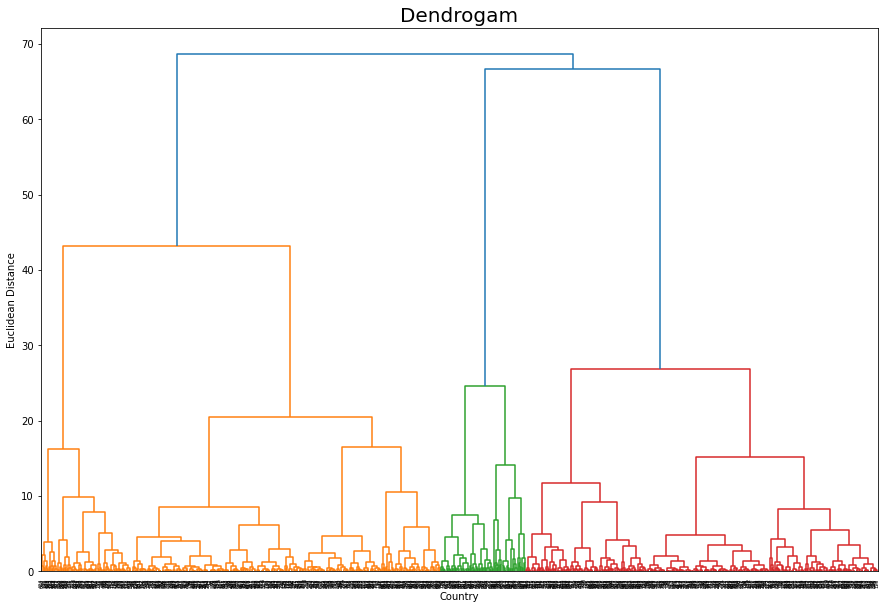

In [ ]:
plt.figure(figsize=(15,10))
cluster=linkage(df_pca, method = 'ward',metric='euclidean')
dendrogram = dendrogram(cluster)
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('University\'s Name')
plt.ylabel('Euclidean Distance')
plt.axhline(y=500)
plt.show()

Based on the above graphic, 3 is the max amount of cluster

In [ ]:
# Looking at the dedrogram it is observed that cutting it at n = 3 is most optimum.

In [ ]:
#Modeling Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster_hc = hc.fit_predict(df_pca)

In [ ]:
#Add cluster result to Dataframe
df_pca['cluster']=cluster_hc

In [ ]:
#Merge Country and Cluster
pca_cluster_hc = pd.concat([data['Name'],df_pca['cluster']], axis=1, join='outer')
pca_cluster_hc.head()

,Name,cluster
0,Abilene Christian University,1
1,Adelphi University,1
2,Adrian College,1
3,Agnes Scott College,0
4,Alaska Pacific University,1


In [ ]:
#Merge to Original Data
data['Cluster_PCA'] = df_pca['cluster']
data.head()

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster_PCA
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [ ]:
#See Characteristic of Cluster in each variables
data.groupby(['Cluster_PCA']).agg('mean')

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cluster_PCA,,,,,,,,,,,,,,,,,
0,2504.320755,1563.827493,525.673854,36.703504,66.371968,2138.463612,376.433962,13317.428571,4938.964960,553.145553,1128.304582,79.681941,86.363881,12.109973,30.239892,12111.237197,75.832884
1,1755.100917,1267.354740,540.088685,16.287462,42.214067,2580.574924,755.097859,7700.896024,3758.370031,534.027523,1423.700306,61.865443,69.681957,15.711927,16.058104,6961.015291,55.290520
2,10496.860759,7265.898734,2967.151899,31.265823,62.354430,15665.949367,3518.898734,8271.405063,4107.025316,595.253165,1994.025316,84.367089,89.898734,16.672152,15.215190,9321.924051,58.873418


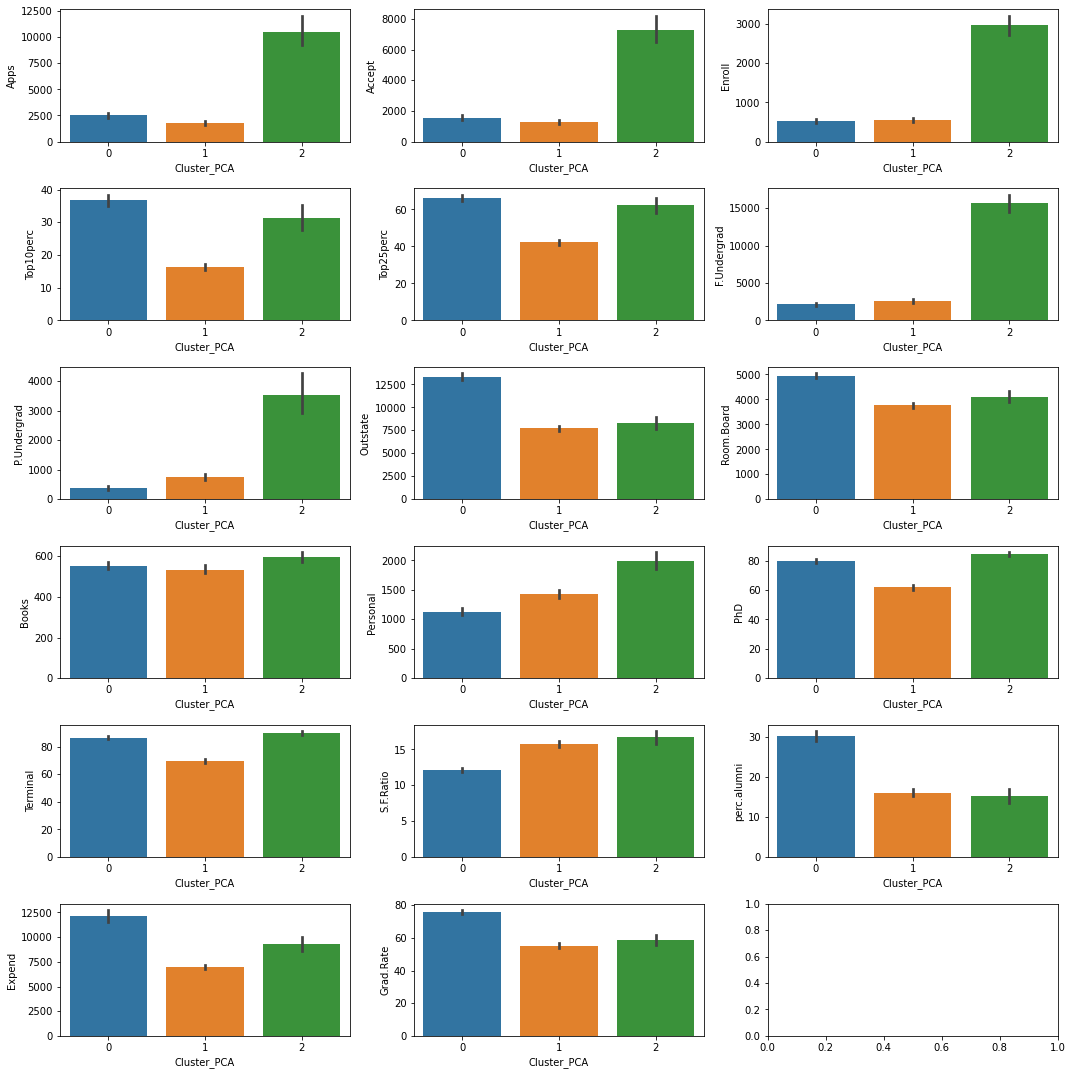

In [ ]:
fig, axs = plt.subplots(6,3,figsize = (15,15))

sns.barplot(x=data.Cluster_PCA, y=data.Apps, ax = axs[0,0])
sns.barplot(x=data.Cluster_PCA, y=data.Accept, ax = axs[0,1])
sns.barplot(x=data.Cluster_PCA, y=data.Enroll, ax = axs[0,2])
sns.barplot(x=data.Cluster_PCA, y=data.Top10perc, ax = axs[1,0])
sns.barplot(x=data.Cluster_PCA, y=data.Top25perc, ax = axs[1,1])
sns.barplot(x=data.Cluster_PCA, y=data['F.Undergrad'], ax = axs[1,2])
sns.barplot(x=data.Cluster_PCA, y=data['P.Undergrad'], ax = axs[2,0])
sns.barplot(x=data.Cluster_PCA, y=data.Outstate, ax = axs[2,1])
sns.barplot(x=data.Cluster_PCA, y=data['Room.Board'], ax = axs[2,2])
sns.barplot(x=data.Cluster_PCA, y=data.Books, ax = axs[3,0])
sns.barplot(x=data.Cluster_PCA, y=data.Personal, ax = axs[3,1])
sns.barplot(x=data.Cluster_PCA, y=data.PhD, ax = axs[3,2])
sns.barplot(x=data.Cluster_PCA, y=data.Terminal, ax = axs[4,0])
sns.barplot(x=data.Cluster_PCA, y=data['S.F.Ratio'], ax = axs[4,1])
sns.barplot(x=data.Cluster_PCA, y=data['perc.alumni'], ax = axs[4,2])
sns.barplot(x=data.Cluster_PCA, y=data.Expend, ax = axs[5,0])
sns.barplot(x=data.Cluster_PCA, y=data['Grad.Rate'], ax = axs[5,1])
plt.tight_layout()

In [ ]:
data[data.Cluster_PCA == 0].Name.values

array(['Agnes Scott College', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alfred University', 'Allegheny College',
       'Allentown Coll. of St. Francis de Sales', 'Alma College',
       'Amherst College', 'Antioch University',
       'Arkansas College (Lyon College)', 'Assumption College',
       'Augustana College IL', 'Augustana College', 'Austin College',
       'Baldwin-Wallace College', 'Barat College', 'Bard College',
       'Barnard College', 'Beaver College', 'Bellarmine College',
       'Beloit College', 'Bennington College', 'Bentley College',
       'Birmingham-Southern College', 'Blackburn College',
       'Bluffton College', 'Bowdoin College', 'Bradford College',
       'Bradley University', 'Brandeis University', 'Bridgewater College',
       'Brown University', 'Bryn Mawr College', 'Bucknell University',
       'Buena Vista College', 'Butler University', 'Cabrini College',
       'Caldwell College', 'California L

In [ ]:
data[data.Cluster_PCA == 1].Name.values

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Alaska Pacific University',
       'Alderson-Broaddus College', 'Alverno College',
       'American International College', 'Anderson University',
       'Andrews University', 'Angelo State University', 'Aquinas College',
       'Arkansas Tech University', 'Augsburg College', 'Averett College',
       'Baker University', 'Barry University', 'Baylor University',
       'Belmont Abbey College', 'Belmont University',
       'Bemidji State University', 'Benedictine College', 'Berry College',
       'Bethany College', 'Bethel College KS', 'Bethel College',
       'Bethune Cookman College', 'Bloomsburg Univ. of Pennsylvania',
       'Bluefield College', 'Brenau University', 'Brewton-Parker College',
       'Briar Cliff College', 'Campbell University',
       'Campbellsville College', 'Capitol College',
       'Carson-Newman College', 'Castleton State College',
       'Catawba College', 'Cazenovia College',

In [ ]:
data[data.Cluster_PCA == 2].Name.values

array(['Appalachian State University',
       'Arizona State University Main campus',
       'Auburn University-Main Campus', 'Boston University',
       'Bowling Green State University',
       'Brigham Young University at Provo',
       'California Polytechnic-San Luis',
       'California State University at Fresno', 'Clemson University',
       'Colorado State University', 'East Carolina University',
       'Florida International University', 'Florida State University',
       'George Mason University', 'Georgia State University',
       'Illinois State University', 'Indiana State University',
       'Indiana University at Bloomington', 'Iowa State University',
       'Kansas State University',
       'Louisiana State University at Baton Rouge',
       'Miami University at Oxford', 'Michigan State University',
       'New York University',
       'North Carolina State University at Raleigh',
       'Northeastern University', 'Northern Arizona University',
       'Northern Illinois 

### K Means

In [ ]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cls.KMeans(n_clusters=k, init = 'k-means++', random_state=42)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

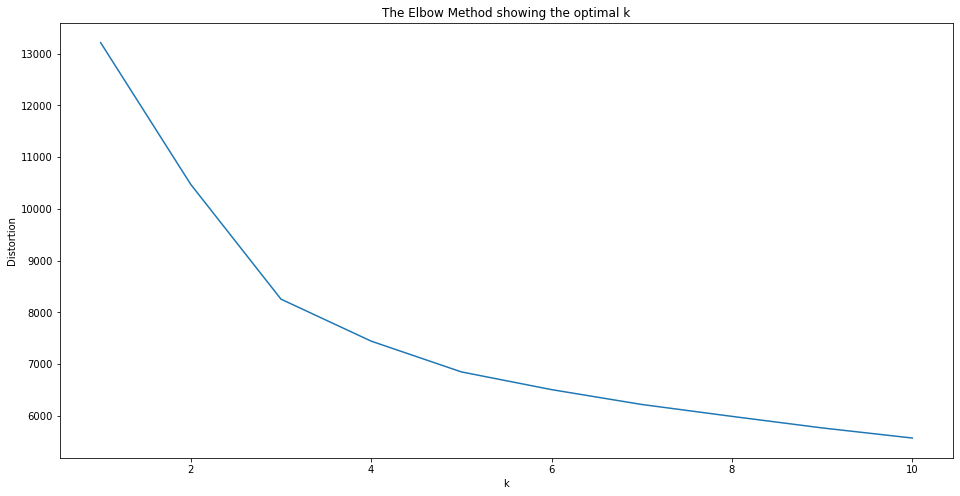

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

from the elbow method above, it is clear to take 3 as the amount of cluster

In [ ]:
kmeanModel = cls.KMeans(n_clusters=3, init = 'k-means++', random_state=42)
kmeanModel.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
y_km=kmeanModel.predict(X)

In [ ]:
data['Cluster_KMeans'] = y_km
data.head()

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster_PCA,Cluster_KMeans
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,450,2200,70,78,18.1,12,7041,60,1,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,750,1500,29,30,12.2,16,10527,56,1,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,400,1165,53,66,12.9,30,8735,54,1,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,450,875,92,97,7.7,37,19016,59,0,2
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,800,1500,76,72,11.9,2,10922,15,1,1


Text(0, 0.5, 'Grad.Rate')

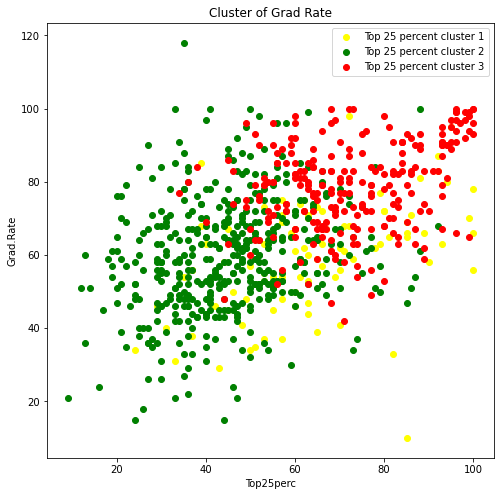

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(data[['Top25perc']][data['Cluster_KMeans']==0],data[['Grad.Rate']][data['Cluster_KMeans']==0], 
            label = 'Top 25 percent cluster 1', c= 'yellow')
plt.scatter(data[['Top25perc']][data['Cluster_KMeans']==1],data[['Grad.Rate']][data['Cluster_KMeans']==1], 
            label = 'Top 25 percent cluster 2', c= 'green')
plt.scatter(data[['Top25perc']][data['Cluster_KMeans']==2],data[['Grad.Rate']][data['Cluster_KMeans']==2],
            label = 'Top 25 percent cluster 3', c='r')
plt.title('Cluster of Grad Rate')
plt.legend()
plt.xlabel('Top25perc')
plt.ylabel('Grad.Rate')

scatter plot showing spread of graduation rate based on top 25 percent

Text(0, 0.5, 'Grad.Rate')

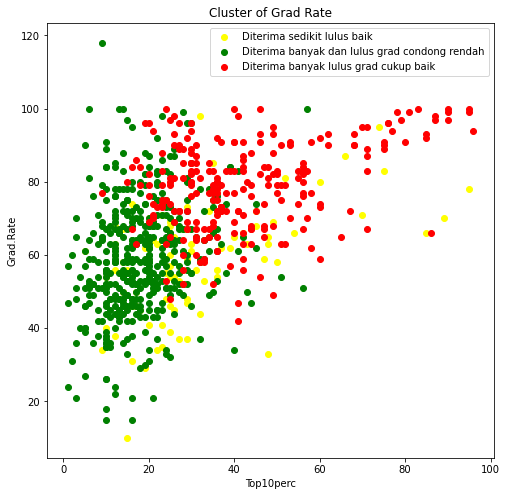

In [ ]:
plt.figure(figsize=(8,8))
centers = kmeanModel.cluster_centers_

plt.scatter(data[['Top10perc']][data['Cluster_KMeans']==0],data[['Grad.Rate']][data['Cluster_KMeans']==0], 
            label = 'Top 10 percent cluster 1', c= 'yellow')
plt.scatter(data[['Top10perc']][data['Cluster_KMeans']==1],data[['Grad.Rate']][data['Cluster_KMeans']==1], 
            label = 'Top 10 percent cluster 2', c= 'green')
plt.scatter(data[['Top10perc']][data['Cluster_KMeans']==2],data[['Grad.Rate']][data['Cluster_KMeans']==2],
            label = 'Top 10 percent cluster 3', c='r')

plt.title('Cluster of Grad Rate')
plt.legend()
plt.xlabel('Top10perc')
plt.ylabel('Grad.Rate')

scatter plot showing spread of graduation rate based on top 10 percent